#**Importing the Required Libraries**

In [1]:
#Importing  os to create a helper variable, which allows us to easily manages different paths in the code  
import os


In [2]:
#glob is used to return all file paths that match a specific pattern. 
import glob

In [3]:
# If we want to display a single image, then "Image" Library is fine, but if we want to display multiple images by just running a single cell
# then we need to import display 

from IPython.display import Image, display

In [4]:
# To clear output in the notebook use clear_output function
#display.clear_output()

# **In the First Step, We need to check whether we have access to the GPU or not**

In [5]:
!nvidia-smi

Mon Feb 20 05:08:12 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P0    31W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
HOME = os.getcwd()

In [7]:
print(HOME)

/content


#**Installing Ultralytics using Pip Install**

#**YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.**

In [8]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -qe ultralytics

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [9]:
!pip install ultralytics==8.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.8/219.8 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 KB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 KB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.5 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144575 sha256=af9b87b6ea9c2e164a0749227e6695083ed08de3d4266febec3ec38449413599
  Stored in directory: /root/.cache/pip/wheels/b1/a3/c2/6df046c09459b73cc9bb6c4401b0be6c47048baf9a1617c485
Success

##Checking whether YOLOv8 is Installed and its working Fine

In [10]:
import ultralytics

In [11]:
ultralytics.checks()

Ultralytics YOLOv8.0.0 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.4/78.2 GB disk)


#**Importing the Crack Segmentation Dataset from Roboflow**

In [12]:
!mkdir {HOME}/datasets


In [13]:
!pwd

/content


In [14]:
%cd {HOME}/datasets


/content/datasets


In [15]:
!pwd

/content/datasets


In [16]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="iOqPD5zonb3Ou6XZ2Xpe")
project = rf.workspace("university-bswxt").project("crack-bphdr")
dataset = project.version(2).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 8.8 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=4cddde8fe1df9880b31de40877ba3fc2016b5d74c0ff06a2493376a6a6539b24
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pypars

loading Roboflow workspace...
loading Roboflow project...

Extracting Dataset Version Zip to crack-2 in yolov5pytorch:: 100%|██████████| 8070/8070 [00:02<00:00, 2937.17it/s]


#**Train the YOLOv8 Model on the Custom Dataset**

In [ ]:
%cd {HOME}

/content


In [ ]:
%cd {dataset.location}

/content/datasets/crack-2


If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

In [17]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8l-seg.pt data=/content/datasets/crack/data.yaml epochs=40 imgsz=640

/content
100% 88.1M/88.1M [00:05<00:00, 18.2MB/s]

yolo/engine/trainer: task=segment, mode=train, model=yolov8l-seg.pt, data=/content/datasets/crack/data.yaml, epochs=40, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0=0.01, lrf=0.01, momentum=0.93

In [35]:
!ls {HOME}/runs/segment/train

args.yaml					   train_batch0.jpg
BoxF1_curve.png					   train_batch1.jpg
BoxP_curve.png					   train_batch2.jpg
BoxPR_curve.png					   train_batch6990.jpg
BoxR_curve.png					   train_batch6991.jpg
confusion_matrix.png				   train_batch6992.jpg
events.out.tfevents.1676869841.d920ca6ec65c.903.0  val_batch0_labels.jpg
MaskF1_curve.png				   val_batch0_pred.jpg
MaskP_curve.png					   val_batch1_labels.jpg
MaskPR_curve.png				   val_batch1_pred.jpg
MaskR_curve.png					   val_batch2_labels.jpg
predictions.json				   val_batch2_pred.jpg
results.csv					   weights
results.png


#**Displaying the Confusion Matrix**

/content


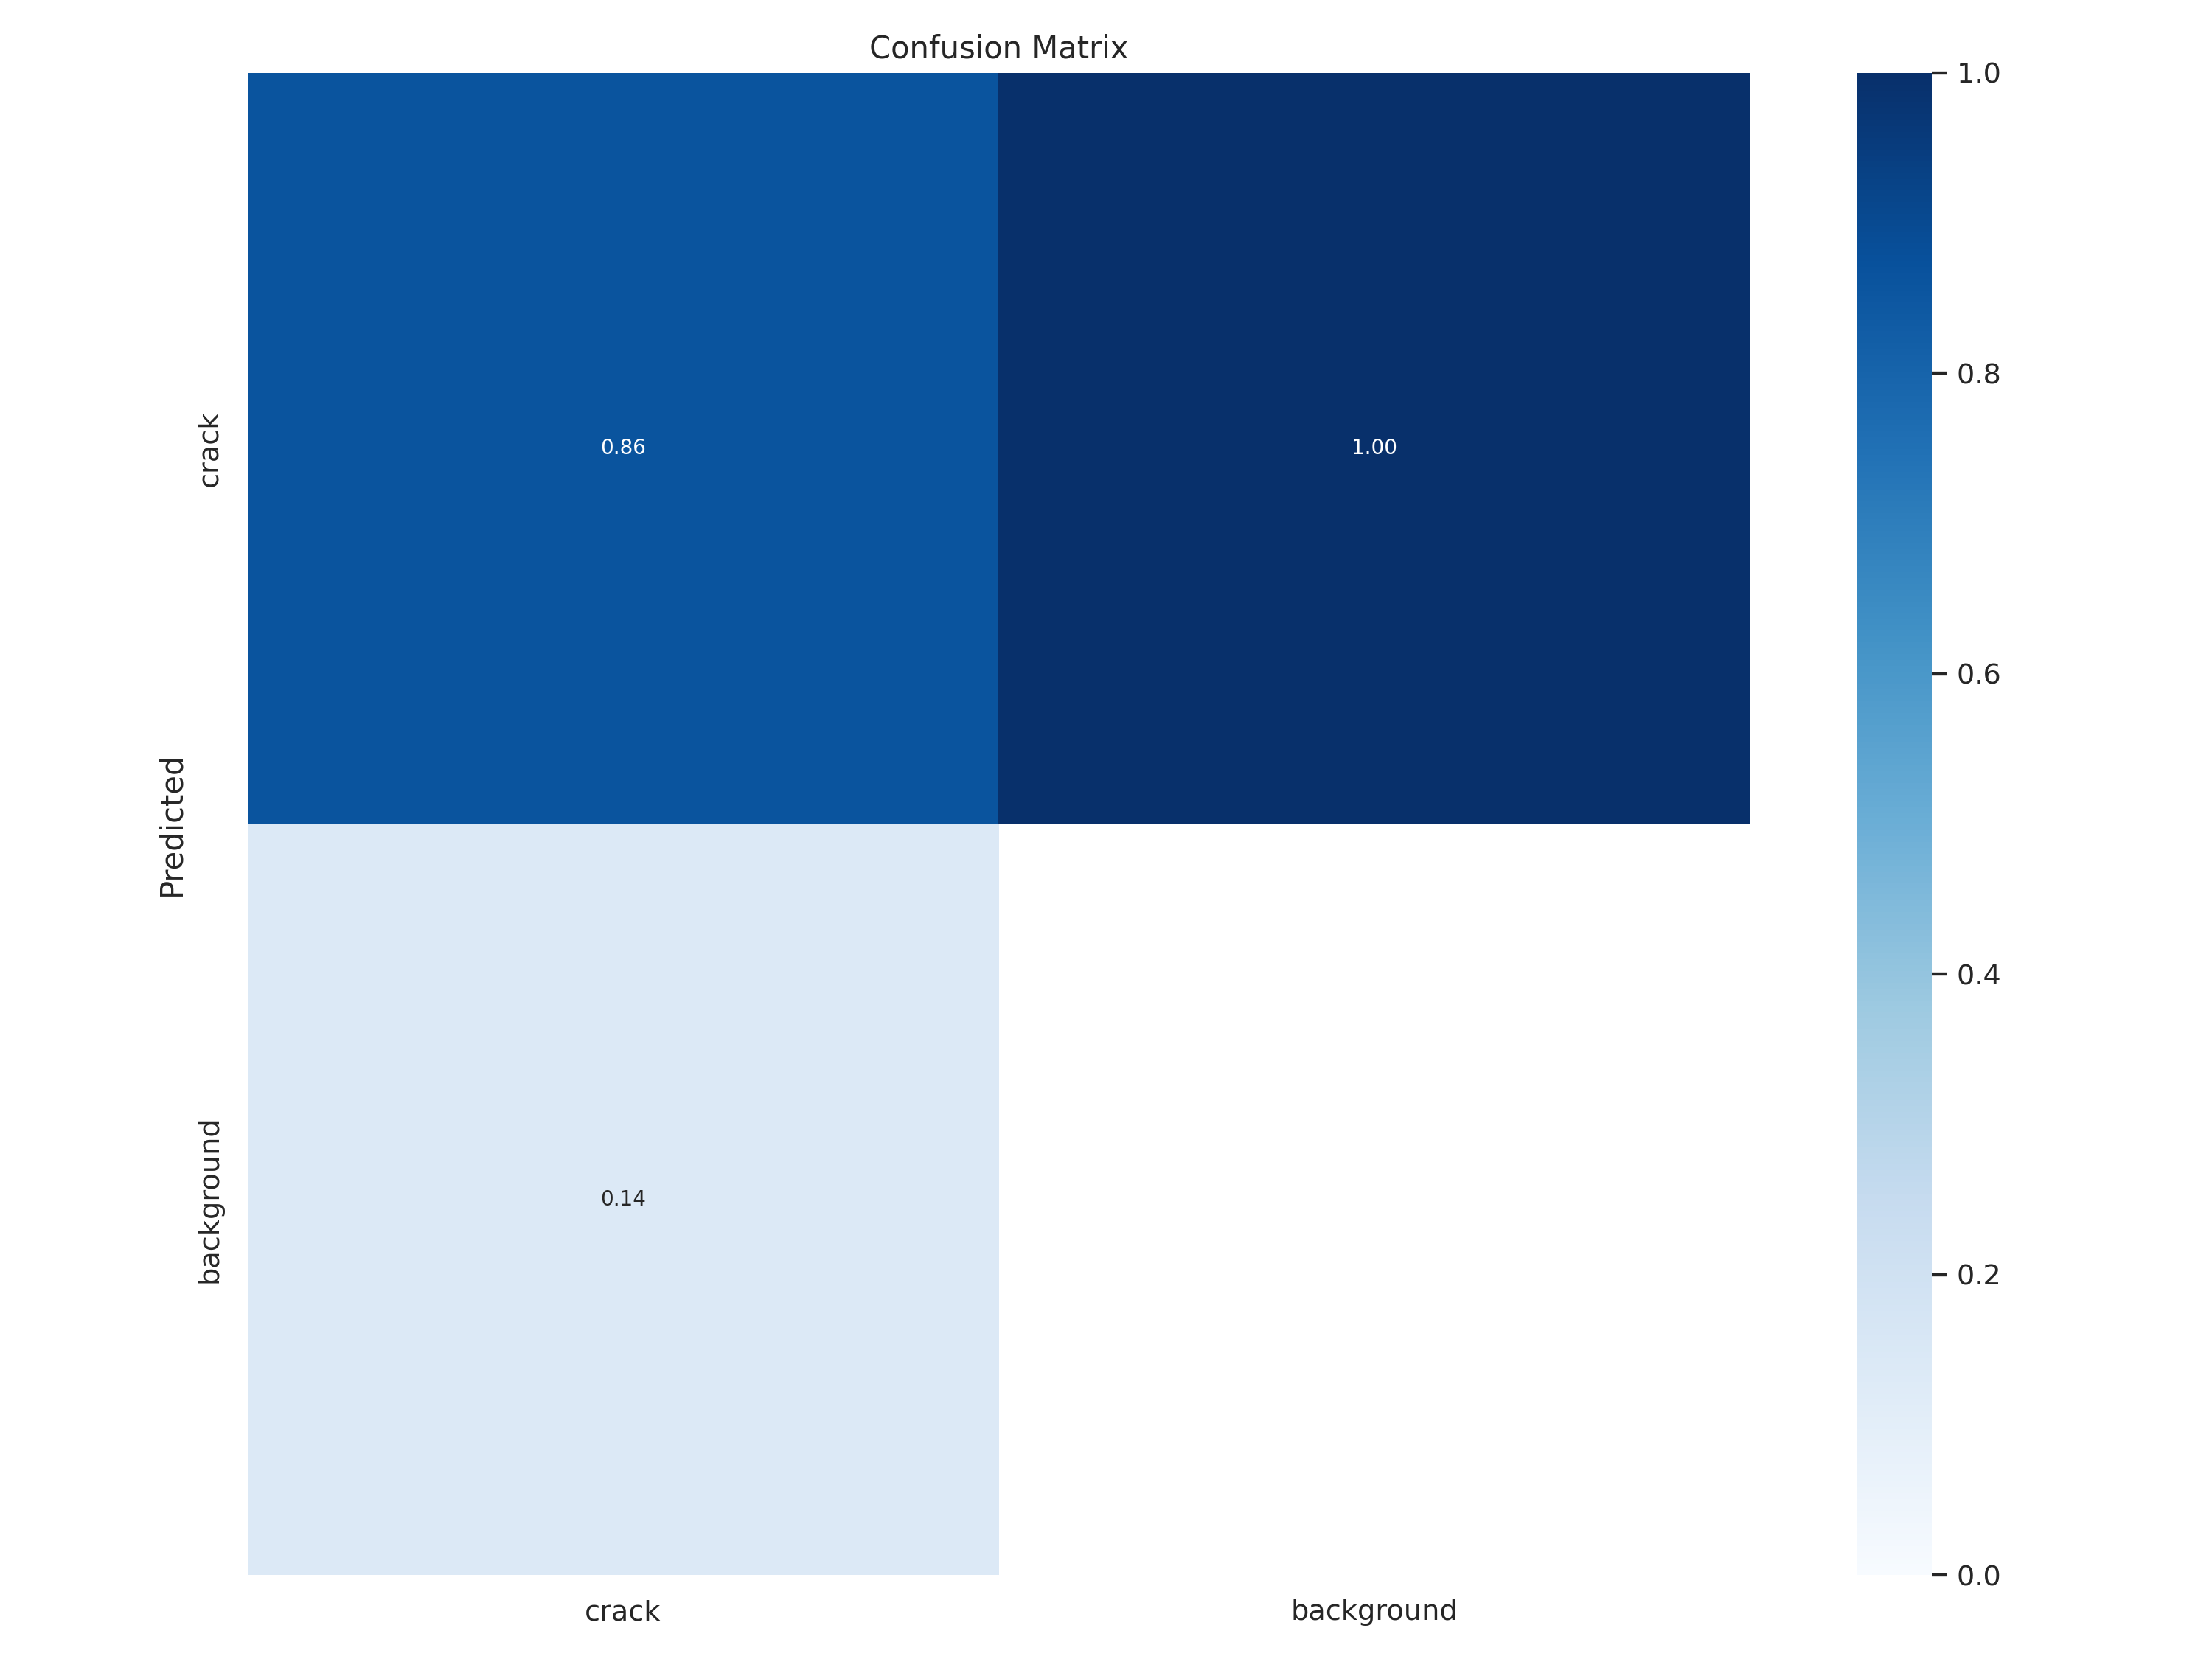

In [20]:
#Confusion matrix is the chart that shows how our model handles different classes
#86% of the time the model detected and segmentation is done correctly that there is a crack,  while 14% of the time 
#when there is a crack the model is unable to detect and do the segmentation on it
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=900)

#**Training and Validation Loss**

/content


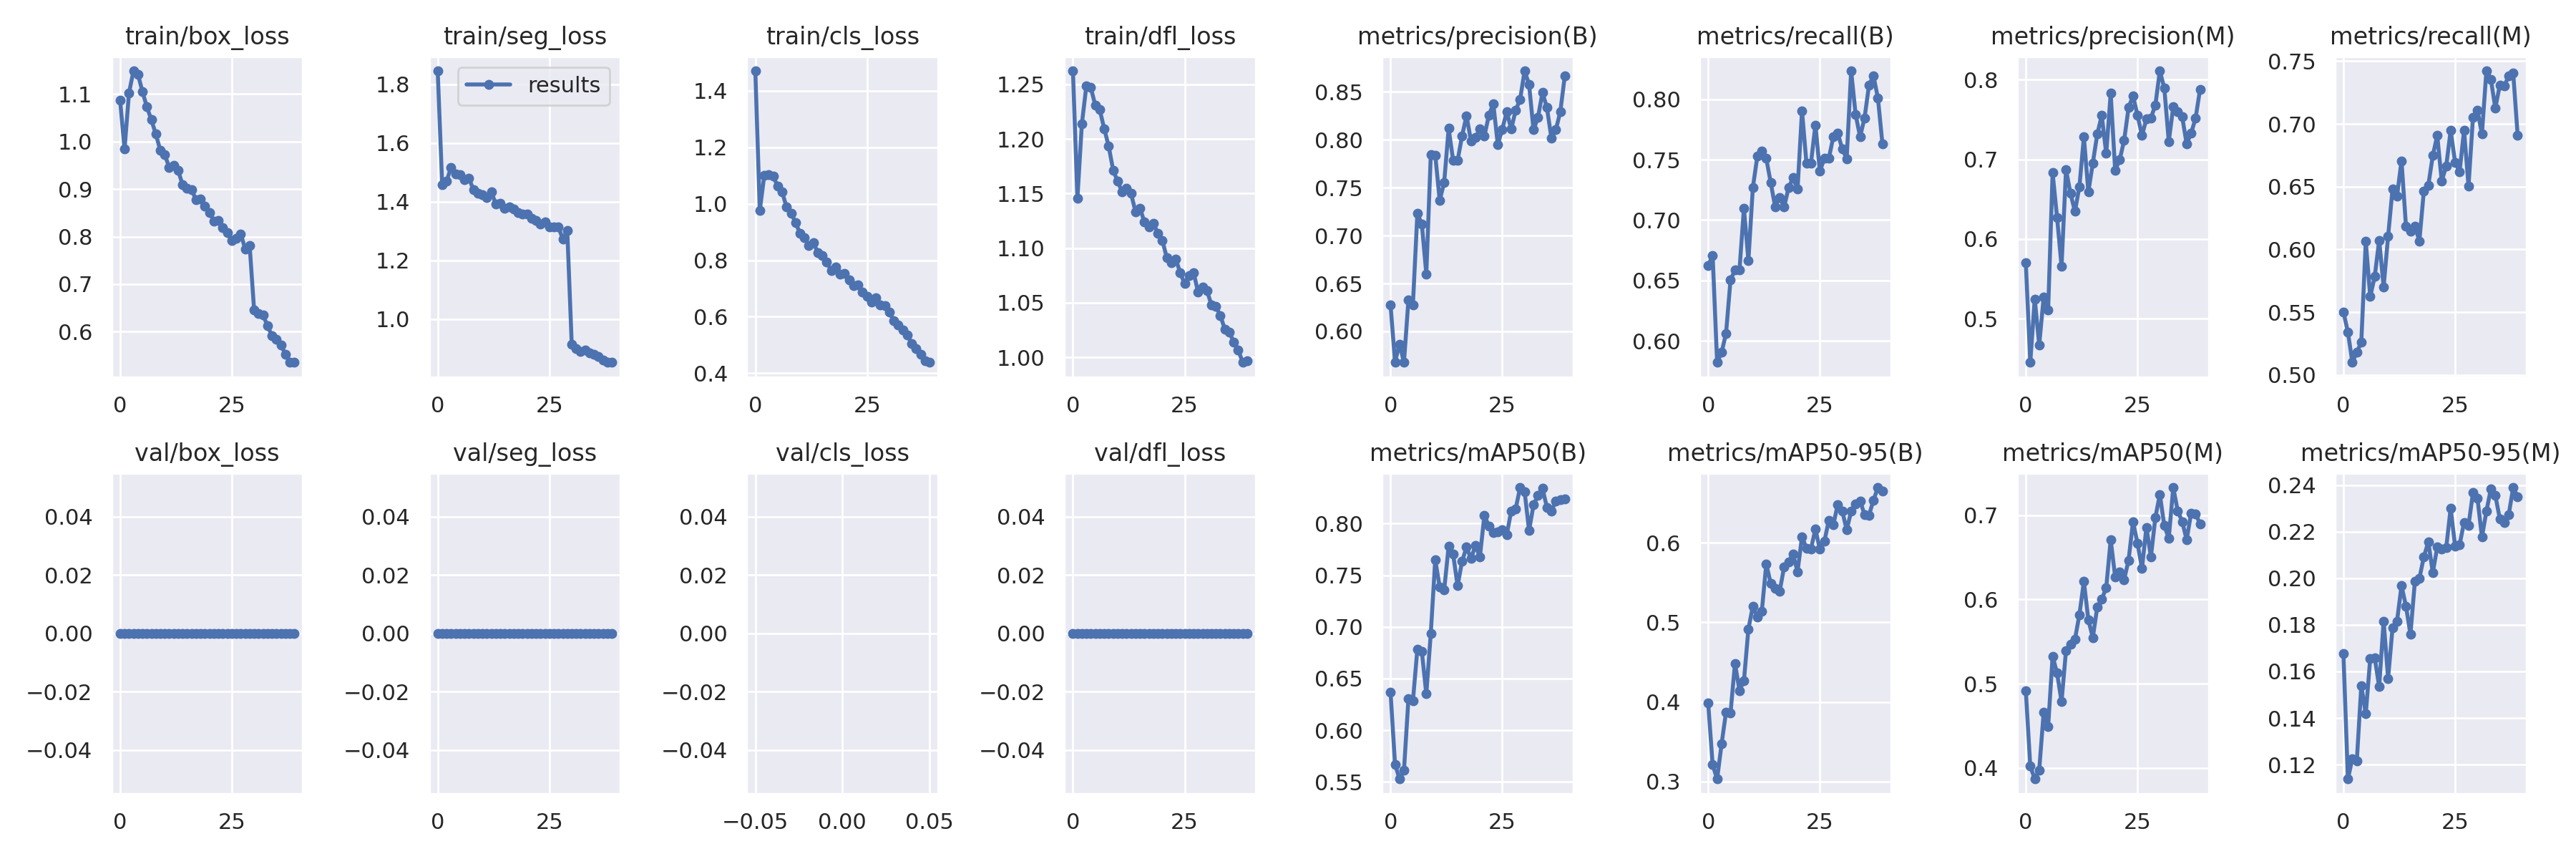

In [21]:
# Here is the graph of the training and validation loss
#box loss and class loss is important 
# The behavior of the model is convincing the model is coverging, Training more will give better results
%cd {HOME}

Image(filename=f'{HOME}/runs/segment/train/results.png', width=600)

/content


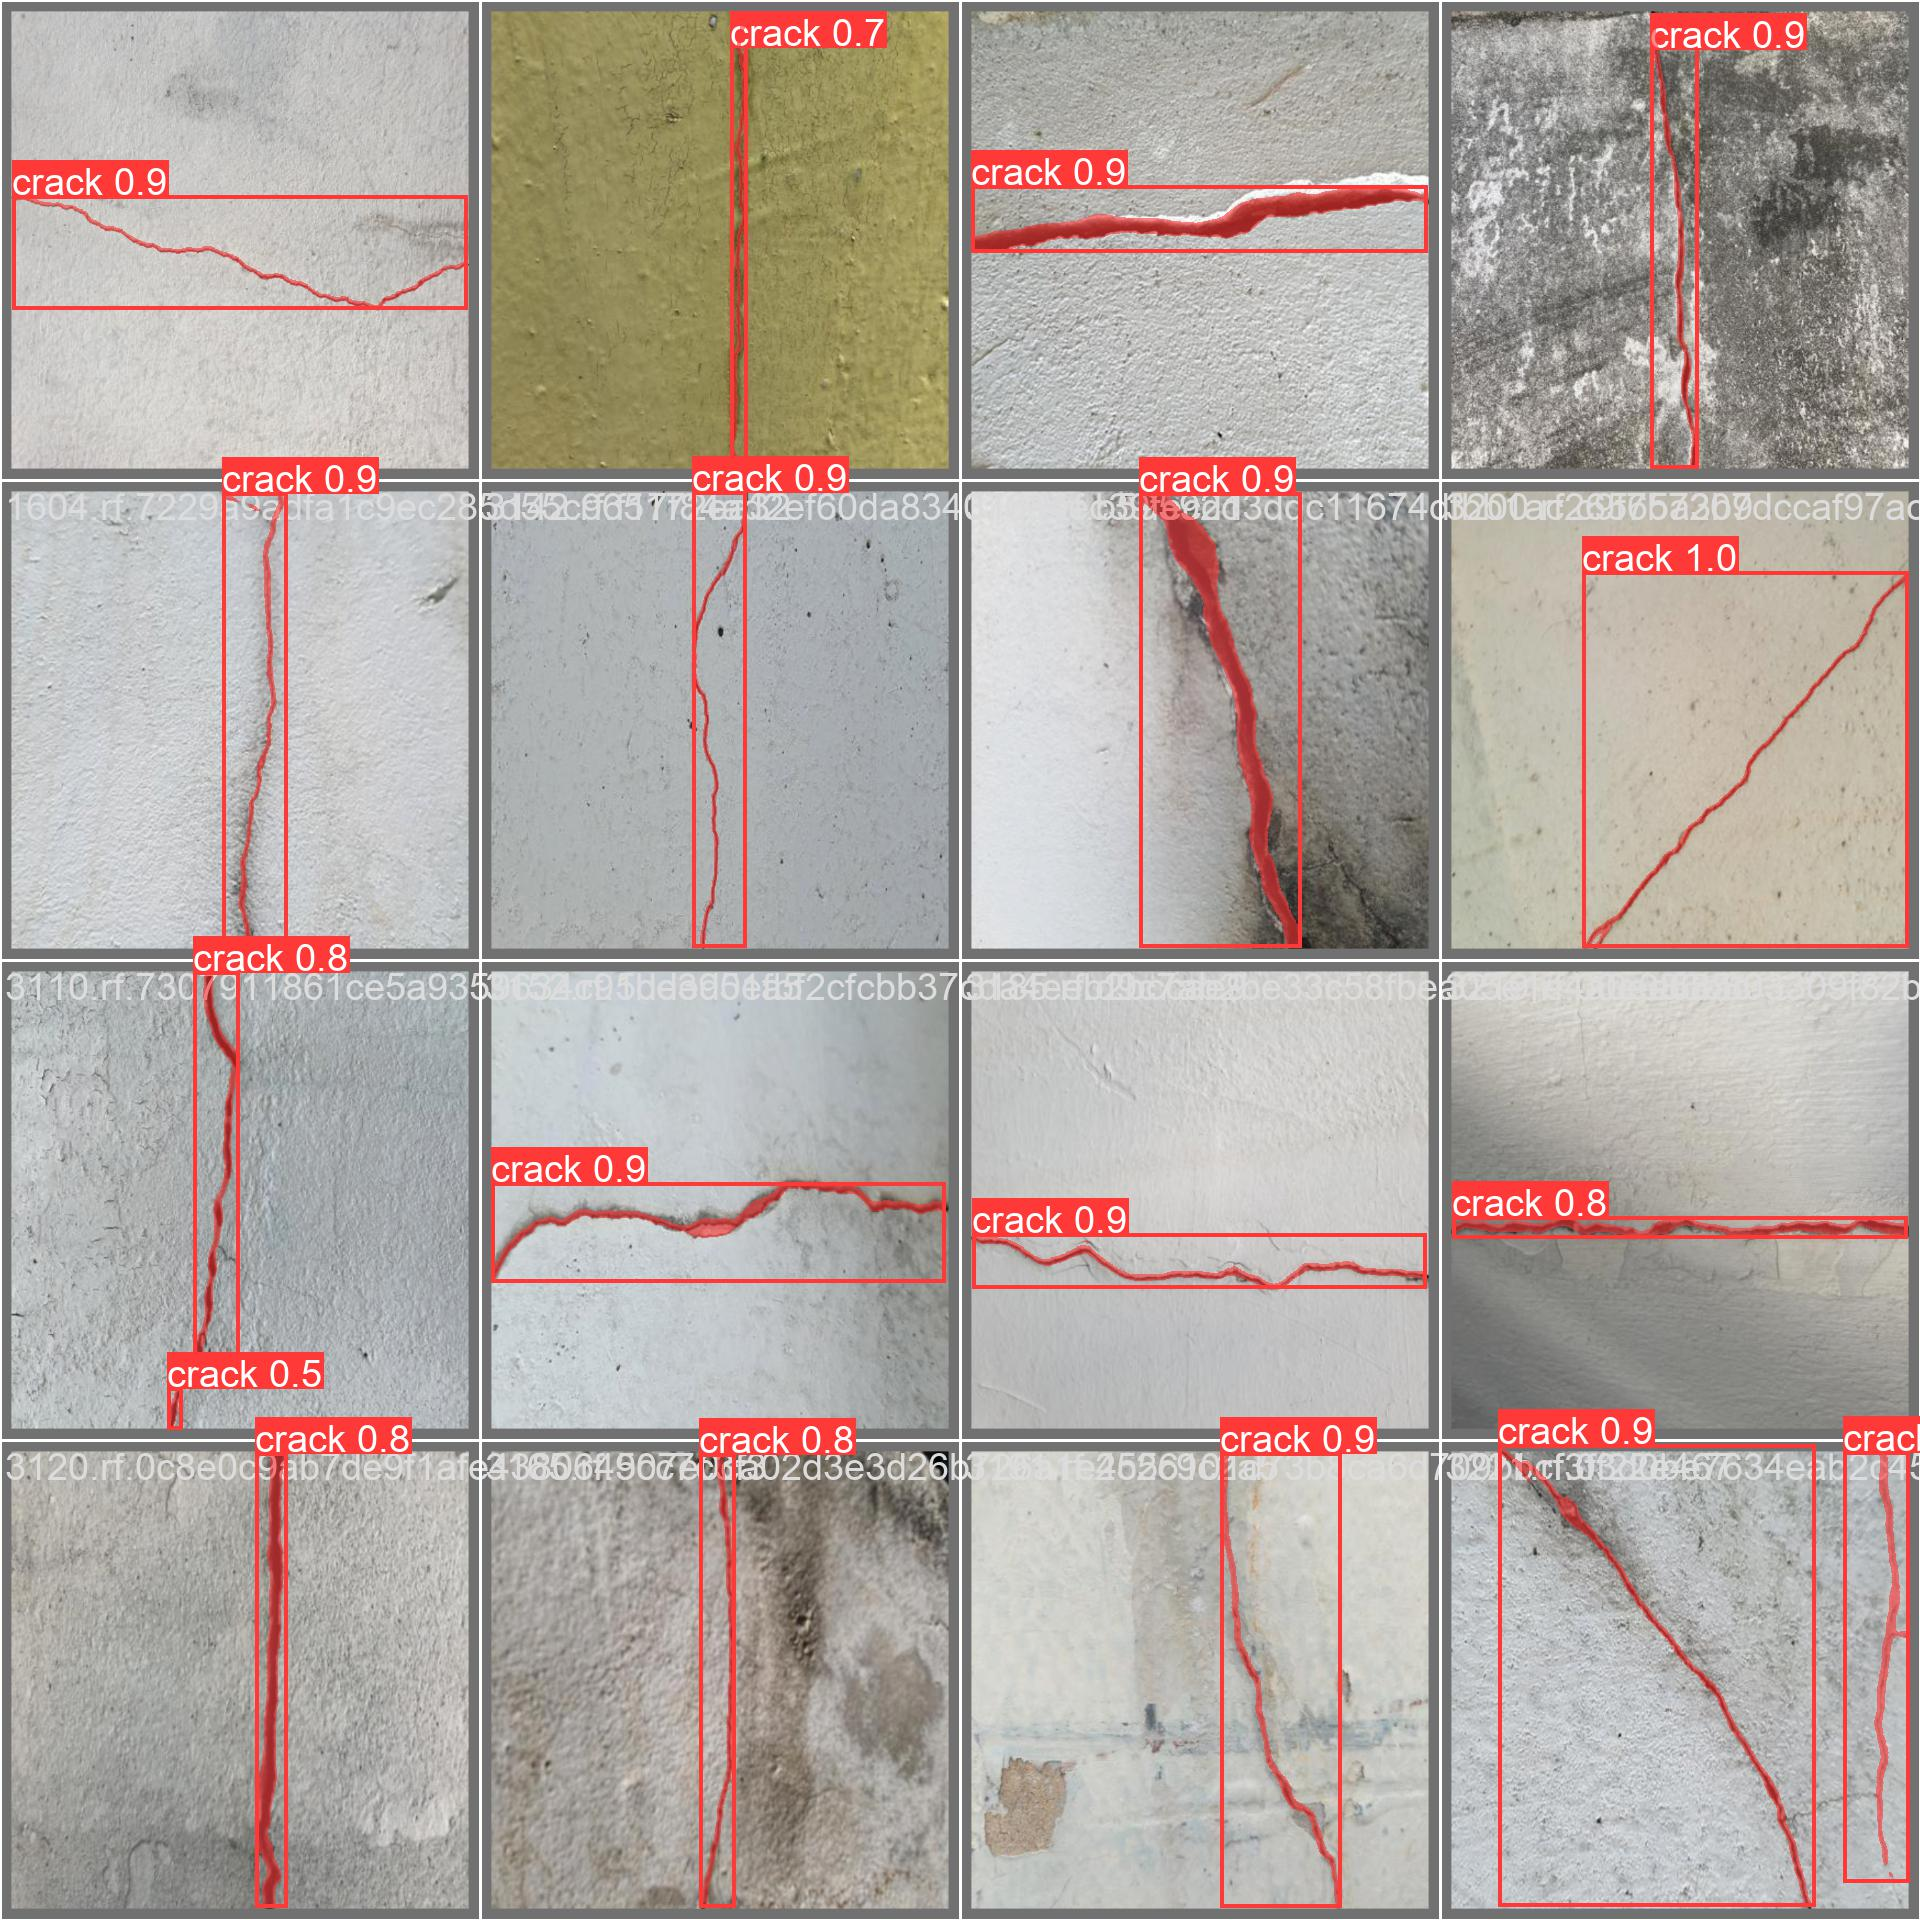

In [22]:
#Model Prediction on validation batch. These image are not used strictly for training so it is always better to take a 
#look and see how model is behaving
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)

#**Validate Custom Model**

In [27]:
#Here, we are taking the model best weights and using them to validate the model. Similarly as before we are using 
#CLI to do that, The only difference is our mode = val instead of train

%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data=/content/datasets/crack/data.yaml

/content
Ultralytics YOLOv8.0.0 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
YOLOv8l-seg summary: 295 layers, 45912659 parameters, 0 gradients, 220.1 GFLOPs
val: Scanning /content/datasets/crack/valid/labels.cache... 200 images, 1 backgrounds, 0 corrupt: 100% 200/200 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 13/13 [00:14<00:00,  1.09s/it]
                   all        200        249      0.829        0.8      0.824      0.669      0.751      0.741      0.701      0.238
Speed: 3.2ms pre-process, 41.4ms inference, 0.0ms loss, 2.4ms post-process per image


#**Inference with Custom Model**

In [26]:
#Inference means a prediction that we can run on an image to detect the label,
# whether classification or of a bounding box or a segmentation
# Testing the Model on Test Dataset images
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source='/content/datasets/crack/test/images'

/content
Ultralytics YOLOv8.0.0 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
YOLOv8l-seg summary: 295 layers, 45912659 parameters, 0 gradients, 220.1 GFLOPs
image 1/112 /content/datasets/crack/test/images/1616.rf.c868709931a671796794fdbb95352c5a.jpg: 640x640 3 cracks, 62.5ms
image 2/112 /content/datasets/crack/test/images/1675.rf.e3aa3f8d28d0247ef0284dd46dacc29f.jpg: 640x640 1 crack, 56.1ms
image 3/112 /content/datasets/crack/test/images/1686.rf.809fb1b51c607e5cf787e44ef4ddd7b8.jpg: 640x640 1 crack, 49.7ms
image 4/112 /content/datasets/crack/test/images/1706.rf.011d213c21ec78896c36728dcbc156f5.jpg: 640x640 1 crack, 40.6ms
image 5/112 /content/datasets/crack/test/images/1716.rf.85ea38b36008beaa72c5d8541f734eb0.jpg: 640x640 4 cracks, 40.5ms
image 6/112 /content/datasets/crack/test/images/1722.rf.38b38f2e833309a4f35bfbf0432dffff.jpg: 640x640 1 crack, 42.4ms
image 7/112 /content/datasets/crack/test/images/1794.rf.7a03ca09d05e9e2941f768bc8570cb54.jpg: 640

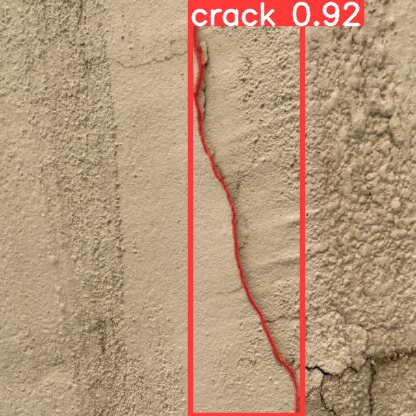

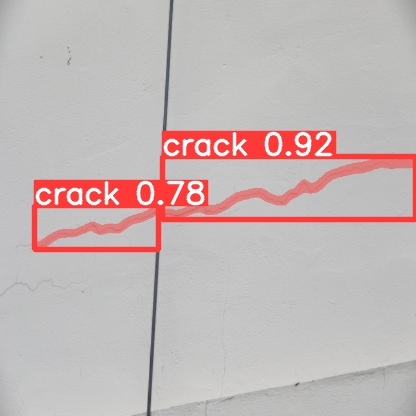

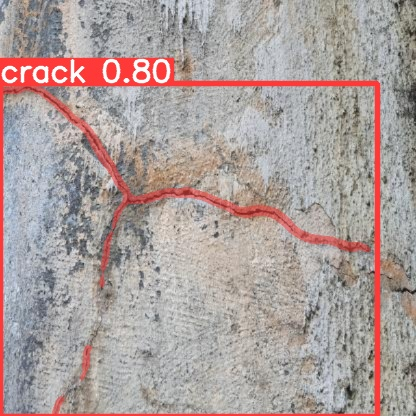

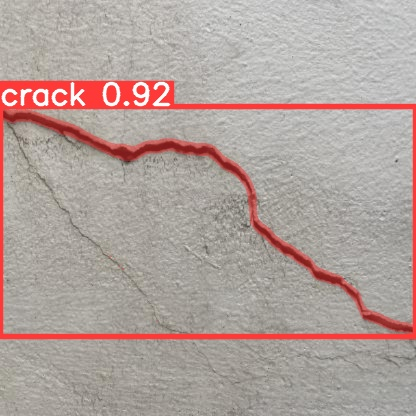

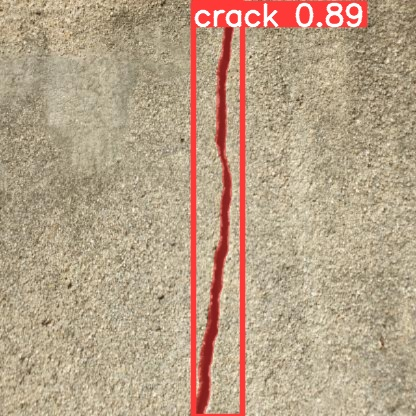

In [29]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:5]:
      display(Image(filename=image_path, width=600))
      print("\n")

#**Testing on a Demo Video**

In [36]:
!gdown "https://drive.google.com/uc?id=13aXiMoB7AvcpLkF-4vqsoWIlKHp-CVGw&confirm=t"


Downloading...
From: https://drive.google.com/uc?id=13aXiMoB7AvcpLkF-4vqsoWIlKHp-CVGw&confirm=t
To: /content/crackvideo.mp4
100% 27.3M/27.3M [00:00<00:00, 77.4MB/s]


In [37]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source='/content/crackvideo.mp4'

/content
Ultralytics YOLOv8.0.0 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
YOLOv8l-seg summary: 295 layers, 45912659 parameters, 0 gradients, 220.1 GFLOPs
video 1/1 (1/723) /content/crackvideo.mp4: 384x640 1 crack, 50.3ms
video 1/1 (2/723) /content/crackvideo.mp4: 384x640 1 crack, 49.4ms
video 1/1 (3/723) /content/crackvideo.mp4: 384x640 1 crack, 49.4ms
video 1/1 (4/723) /content/crackvideo.mp4: 384x640 1 crack, 49.3ms
video 1/1 (5/723) /content/crackvideo.mp4: 384x640 1 crack, 49.3ms
video 1/1 (6/723) /content/crackvideo.mp4: 384x640 1 crack, 49.1ms
video 1/1 (7/723) /content/crackvideo.mp4: 384x640 1 crack, 43.6ms
video 1/1 (8/723) /content/crackvideo.mp4: 384x640 1 crack, 43.6ms
video 1/1 (9/723) /content/crackvideo.mp4: 384x640 1 crack, 43.7ms
video 1/1 (10/723) /content/crackvideo.mp4: 384x640 1 crack, 43.6ms
video 1/1 (11/723) /content/crackvideo.mp4: 384x640 1 crack, 43.7ms
video 1/1 (12/723) /content/crackvideo.mp4: 384x640 1 crack, 43.6ms


#**Display the Demo Video**

In [32]:
!rm "/content/result_compressed.mp4"

rm: cannot remove '/content/result_compressed.mp4': No such file or directory


In [34]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/segment/predict3/crackvideo.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)